## Preprocessing + Visualization Code

C:\Users\bollejayanthsriteja\AppData\Local\Temp\ipykernel_30576\1363530014.py:22: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


Dataset Summary:
             Close         High          Low         Open        Volume  \
count  2516.000000  2516.000000  2516.000000  2516.000000  2.516000e+03   
mean     94.057251    94.970058    93.041267    93.969454  1.170838e+08   
std      65.580756    66.173951    64.892216    65.498488  6.839796e+07   
min      20.647459    20.951433    20.448619    20.569750  2.323470e+07   
25%      35.297103    35.695864    34.918261    35.317366  7.105610e+07   
50%      64.523579    65.079496    63.719947    64.363800  1.003646e+08   
75%     150.550343   152.302044   148.579895   150.372680  1.426216e+08   
max     258.396667   259.474086   257.010028   257.568678  6.488252e+08   

              MA20         MA50  Daily Return  
count  2497.000000  2467.000000   2515.000000  
mean     93.722236    93.261421      0.001091  
std      64.871025    63.946775      0.017928  
min      21.451669    21.872072     -0.128647  
25%      35.456658    35.173075     -0.007326  
50%      64.391603 

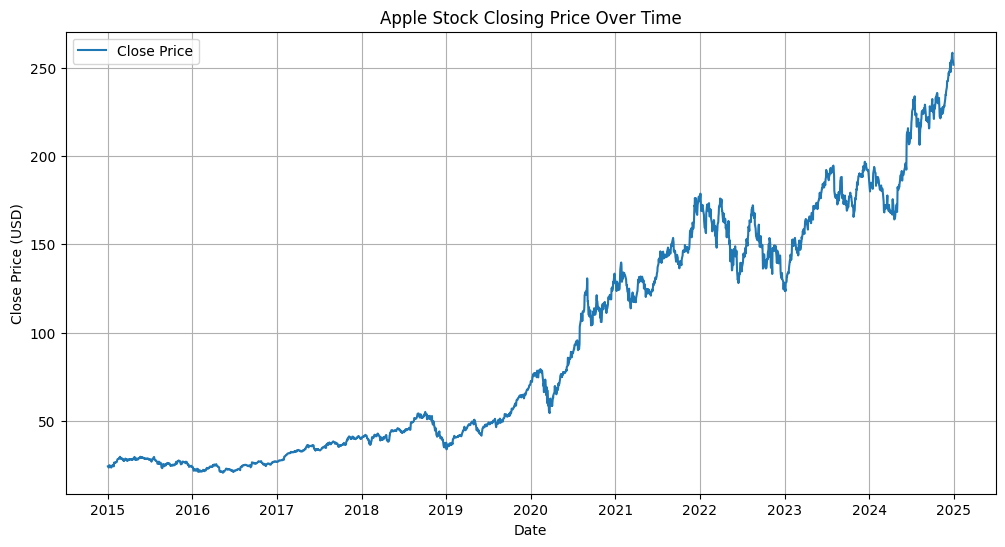

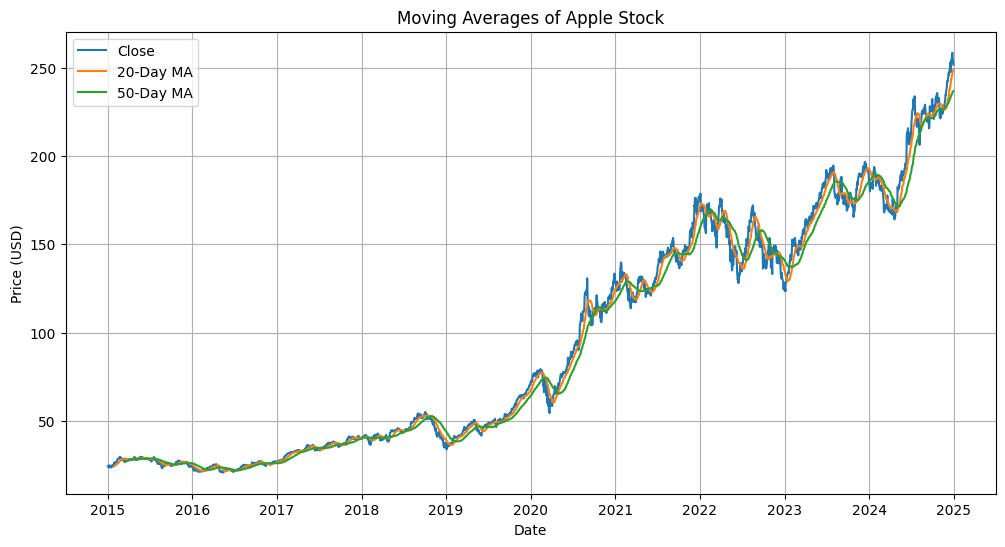

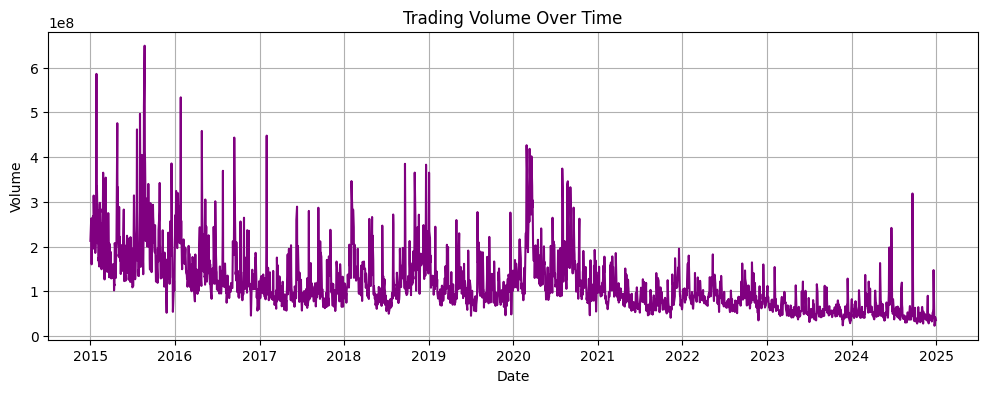

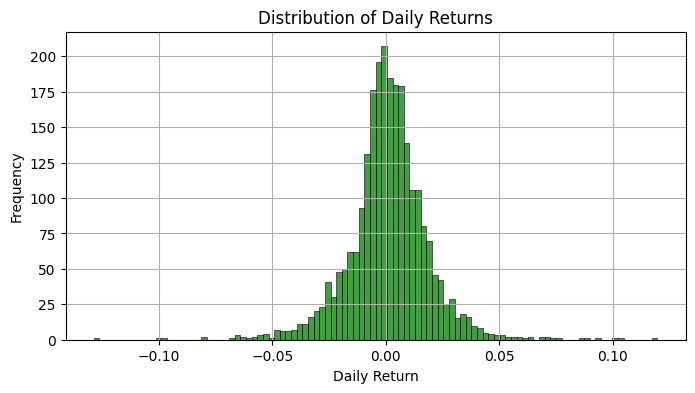

In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.io as pio

# Load CSV file
df = pd.read_csv("AAPL_clean.csv")

# Convert 'Date' to datetime and sort
df['Date'] = pd.to_datetime(df['Date'])
df.sort_values('Date', inplace=True)
df.set_index('Date', inplace=True)

# Convert all numeric columns properly 
numeric_columns = ['Open', 'High', 'Low', 'Close', 'Volume']
for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Handle missing values 
df.fillna(method='ffill', inplace=True)

# Add moving averages
df['MA20'] = df['Close'].rolling(window=20).mean()
df['MA50'] = df['Close'].rolling(window=50).mean()

# Add daily returns
df['Daily Return'] = df['Close'].pct_change()

# Summary
print("Dataset Summary:")
print(df.describe())
print("\n🔍 Missing Values:")
print(df.isnull().sum())

# -----------------------------
# VISUALIZATIONS
# -----------------------------

# Closing Price Over Time
plt.figure(figsize=(12,6))
plt.plot(df['Close'], label='Close Price')
plt.title('Apple Stock Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')
plt.grid(True)
plt.legend()
plt.show()

# Moving Averages
plt.figure(figsize=(12,6))
plt.plot(df['Close'], label='Close')
plt.plot(df['MA20'], label='20-Day MA')
plt.plot(df['MA50'], label='50-Day MA')
plt.title('Moving Averages of Apple Stock')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

# Volume Over Time
plt.figure(figsize=(12,4))
plt.plot(df['Volume'], color='purple')
plt.title('Trading Volume Over Time')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.grid(True)
plt.show()

# Daily Returns Histogram
plt.figure(figsize=(8,4))
sns.histplot(df['Daily Return'].dropna(), bins=100, color='green')
plt.title('Distribution of Daily Returns')
plt.xlabel('Daily Return')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Interactive Candlestick Chart (OHLC)
candlestick = go.Figure(data=[go.Candlestick(
    x=df.index,
    open=df['Open'],
    high=df['High'],
    low=df['Low'],
    close=df['Close']
)])
candlestick.update_layout(
    title="Apple Candlestick Chart (2015–2024)",
    xaxis_title='Date',
    yaxis_title='Price (USD)',
    xaxis_rangeslider_visible=False
)
pio.renderers.default = "vscode"
candlestick.show()